## Data Preprocessing

In [89]:
# Load cifar10 dataset
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Data Exploration

In [90]:
print('Shape of x_train: ' + str(x_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_test: ' + str(y_test.shape))
print('Number of classes: ' + str(np.max(y_train) - np.min(y_train) + 1))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
Number of classes: 10


In [91]:
# Checking the number of unique classes 
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [92]:
# Creating a list of all the class labels
class_label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

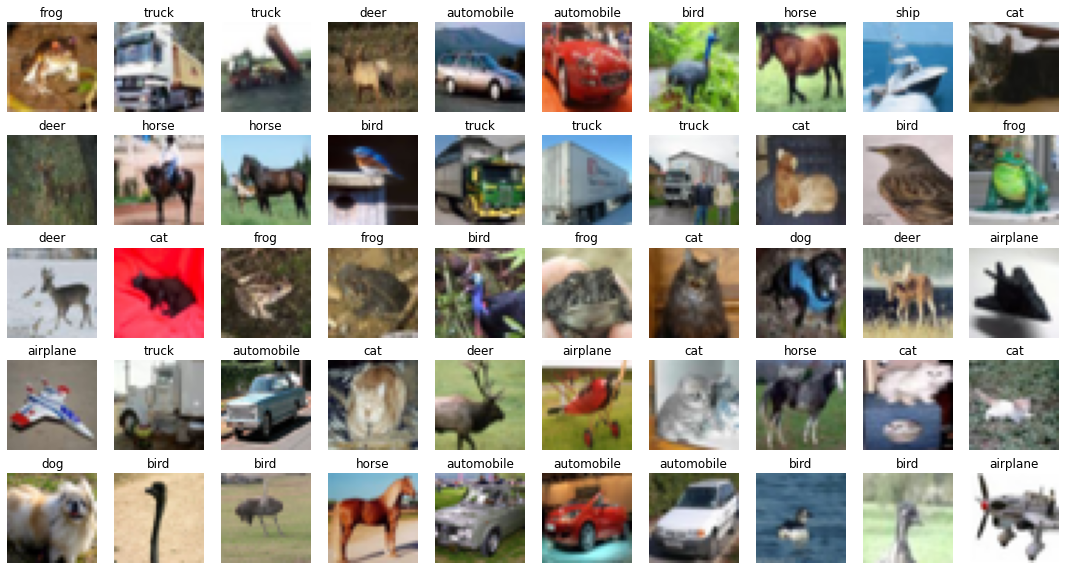

In [93]:
# Create a figure with a grid of subplots
num_rows = 5
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i in range(num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    if i < len(x_train):
        image = x_train[i]
        label_index = y_train[i][0]
        class_name = class_label[label_index]

        axes[row, col].imshow(image)
        axes[row, col].axis('off')  # Turn off axis labels
        axes[row, col].set_title(class_name)  # Set the class name as the title

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [94]:
#Normalize pixel values to be between 0 and 1

x_train = x_train / 255.0
x_test = x_test / 255.0

### One-hot encode labels

In [95]:
def one_hot(y, num_class = 10):
    label_list = list(y)
    
    resultant_list = list(map(lambda y: [1 if i == y else 0 for i in range(10)], label_list))
    result = np.array(resultant_list)
    return result

y_train_vec = one_hot(y_train)
y_test_vec = one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)


### Randomly partition the training set to training and validation sets

In [96]:
rand_indices = np.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_training = x_train[train_indices, :]
y_training = y_train_vec[train_indices, :]

x_validation = x_train[valid_indices, :]
y_validation = y_train_vec[valid_indices, :] 

print('Shape of x_training: ' + str(x_training.shape))
print('Shape of y_training: ' + str(y_training.shape))
print('Shape of x_validation: ' + str(x_validation.shape))
print('Shape of y_validation: ' + str(y_validation.shape))

Shape of x_training: (40000, 32, 32, 3)
Shape of y_training: (40000, 10)
Shape of x_validation: (10000, 32, 32, 3)
Shape of y_validation: (10000, 10)


### Build CNN and tune its hyper-parameters

In [97]:
# Build the model
from keras import layers, models, optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(4,4), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 32)        16416     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 64)        

In [98]:
# Define model optimizer and loss function
#RMSprop with 1e-4, 0.001, 0.01

model.compile( optimizer = optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
history = model.fit(x_training, y_training, batch_size=100, epochs=50, validation_data=(x_validation, y_validation), validation_steps = 20)

Epoch 1/50
400/400 [==============================] - 19s 45ms/step - loss: 2.0844 - accuracy: 0.2477 - val_loss: 1.9037 - val_accuracy: 0.3060
Epoch 2/50
400/400 [==============================] - 17s 42ms/step - loss: 1.8074 - accuracy: 0.3482 - val_loss: 1.7759 - val_accuracy: 0.3525
Epoch 3/50
400/400 [==============================] - 18s 45ms/step - loss: 1.6908 - accuracy: 0.3927 - val_loss: 1.6693 - val_accuracy: 0.4125
Epoch 4/50
400/400 [==============================] - 18s 46ms/step - loss: 1.6041 - accuracy: 0.4238 - val_loss: 1.6025 - val_accuracy: 0.4305
Epoch 5/50
400/400 [==============================] - 19s 46ms/step - loss: 1.5375 - accuracy: 0.4459 - val_loss: 1.5397 - val_accuracy: 0.4510
Epoch 6/50
400/400 [==============================] - 18s 45ms/step - loss: 1.4830 - accuracy: 0.4639 - val_loss: 1.5026 - val_accuracy: 0.4665
Epoch 7/50
400/400 [==============================] - 18s 46ms/step - loss: 1.4428 - accuracy: 0.4790 - val_loss: 1.4803 - val_accuracy:

### Plot the curve vs epochs of the training and the validation loss

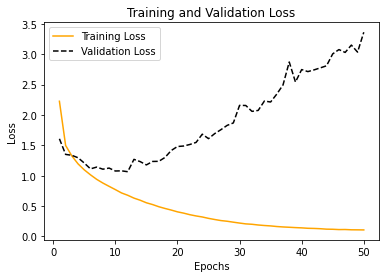

In [11]:
# Plot the loss curve
import matplotlib.pyplot as plt

# Extract the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, color = 'orange', linestyle = '-', label='Training Loss')
plt.plot(epochs, val_loss, color = 'black', linestyle = '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Again train and evaluate the model

In [12]:
#Compile the model again (using the same hyper-parameters you tuned above)

model.compile( optimizer = optimizers.RMSprop(learning_rate=0.0003), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [13]:
#Train your model on the entire training set (50K samples)

history_train = model.fit(x_train, y_train_vec, batch_size =100, epochs=50)

Epoch 1/50
500/500 [==============================] - 19s 36ms/step - loss: 0.5603 - accuracy: 0.9080
Epoch 2/50
500/500 [==============================] - 19s 38ms/step - loss: 0.4118 - accuracy: 0.9162
Epoch 3/50
500/500 [==============================] - 22s 44ms/step - loss: 0.3405 - accuracy: 0.9274
Epoch 4/50
500/500 [==============================] - 22s 43ms/step - loss: 0.2923 - accuracy: 0.9344
Epoch 5/50
500/500 [==============================] - 22s 43ms/step - loss: 0.2560 - accuracy: 0.9411
Epoch 6/50
500/500 [==============================] - 22s 44ms/step - loss: 0.2266 - accuracy: 0.9473
Epoch 7/50
500/500 [==============================] - 22s 43ms/step - loss: 0.2016 - accuracy: 0.9530
Epoch 8/50
500/500 [==============================] - 22s 43ms/step - loss: 0.1787 - accuracy: 0.9566
Epoch 9/50
500/500 [==============================] - 22s 43ms/step - loss: 0.1605 - accuracy: 0.9606
Epoch 10/50
500/500 [==============================] - 22s 43ms/step - loss: 0.142

In [ ]:
# Evaluate your model performance (testing accuracy) on testing data.
accuracy = model.evaluate(x_test, y_test_vec)
print('Loss =' + str(round(accuracy[0],2)))
print('Accuracy =' + str(round(accuracy[1],2)))

## Build a model to increase a complexity with different layers

### Model1

In [14]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3), input_shape=(32,32,3)))
model1.add(layers.BatchNormalization()) #batch normalization 1
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(4,4)))
model1.add(layers.BatchNormalization()) #batch normalization 2
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256))
model1.add(layers.Dropout(0.5)) #dropout layer 1
model1.add(layers.BatchNormalization()) #batch normalization 3
model1.add(layers.Activation('relu'))
model1.add(layers.Dropout(0.5)) #dropout layer 2
model1.add(layers.BatchNormalization()) #batch normalization 4
model1.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 64)          51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 64)        

In [15]:
model1.compile( optimizer = optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [16]:
history_model1 = model1.fit(x_training, y_training, batch_size=100, epochs=40, validation_data=(x_validation, y_validation), validation_steps = 20)

Epoch 1/40
400/400 [==============================] - 23s 55ms/step - loss: 2.1957 - accuracy: 0.2851 - val_loss: 1.4900 - val_accuracy: 0.4780
Epoch 2/40
400/400 [==============================] - 24s 61ms/step - loss: 1.7796 - accuracy: 0.3876 - val_loss: 1.3477 - val_accuracy: 0.5220
Epoch 3/40
400/400 [==============================] - 27s 67ms/step - loss: 1.5921 - accuracy: 0.4439 - val_loss: 1.2348 - val_accuracy: 0.5775
Epoch 4/40
400/400 [==============================] - 27s 67ms/step - loss: 1.4573 - accuracy: 0.4898 - val_loss: 1.1593 - val_accuracy: 0.6080
Epoch 5/40
400/400 [==============================] - 27s 67ms/step - loss: 1.3619 - accuracy: 0.5185 - val_loss: 1.1210 - val_accuracy: 0.6115
Epoch 6/40
400/400 [==============================] - 27s 66ms/step - loss: 1.2923 - accuracy: 0.5445 - val_loss: 1.1398 - val_accuracy: 0.5985
Epoch 7/40
400/400 [==============================] - 31s 77ms/step - loss: 1.2390 - accuracy: 0.5636 - val_loss: 1.0444 - val_accuracy:

### Plot the curve vs epochs of the training and the validation loss

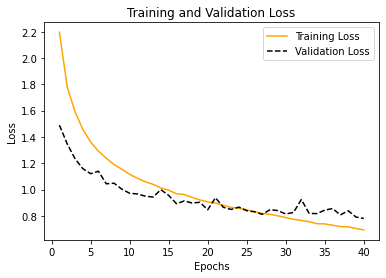

In [17]:
# Extract the training and validation loss values from the history object
train_loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, color = 'orange', linestyle = '-', label='Training Loss')
plt.plot(epochs, val_loss, color = 'black', linestyle = '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the curve vs epochs of the training and the validation accuracy

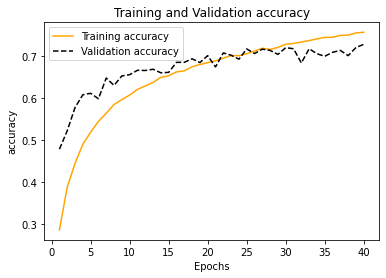

In [19]:
# Extract the training and validation loss values from the history object
train_accuracy = history_model1.history['accuracy']
val_accuracy = history_model1.history['val_accuracy']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_accuracy, color = 'orange', linestyle = '-', label='Training accuracy')
plt.plot(epochs, val_accuracy, color = 'black', linestyle = '--', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [20]:
model1.compile( optimizer = optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [21]:
history_model1_train = model1.fit(x_train, y_train_vec, batch_size =128, epochs=40)

Epoch 1/40
391/391 [==============================] - 33s 84ms/step - loss: 0.7372 - accuracy: 0.7457
Epoch 2/40
391/391 [==============================] - 36s 92ms/step - loss: 0.7204 - accuracy: 0.7513
Epoch 3/40
391/391 [==============================] - 36s 92ms/step - loss: 0.7166 - accuracy: 0.7533
Epoch 4/40
391/391 [==============================] - 37s 94ms/step - loss: 0.7008 - accuracy: 0.7583
Epoch 5/40
391/391 [==============================] - 36s 93ms/step - loss: 0.6951 - accuracy: 0.7580
Epoch 6/40
391/391 [==============================] - 37s 94ms/step - loss: 0.6899 - accuracy: 0.7605
Epoch 7/40
391/391 [==============================] - 37s 94ms/step - loss: 0.6790 - accuracy: 0.7647
Epoch 8/40
391/391 [==============================] - 38s 98ms/step - loss: 0.6692 - accuracy: 0.7688
Epoch 9/40
391/391 [==============================] - 38s 98ms/step - loss: 0.6635 - accuracy: 0.7683
Epoch 10/40
391/391 [==============================] - 38s 96ms/step - loss: 0.656

In [22]:
accuracy = model1.evaluate(x_test, y_test_vec)
print('Loss =' + str(round(accuracy[0],2)))
print('Accuracy =' + str(round(accuracy[1],2)))

313/313 [==============================] - 3s 8ms/step - loss: 0.8573 - accuracy: 0.7344
Loss =0.86
Accuracy =0.73


### Model2

In [23]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3), input_shape=(32,32,3)))
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(4,4)))
model2.add(layers.BatchNormalization()) #batch normalization layers 1
model2.add(layers.Activation('relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(256))
model2.add(layers.Dropout(0.4)) #dropout layer 1
model2.add(layers.BatchNormalization()) #batch normalization layers 2
model2.add(layers.Activation('relu'))
model2.add(layers.Dropout(0.5)) #dropout layer 2
model2.add(layers.BatchNormalization()) #batch normalization layers 3
model2.add(layers.Dense(10, activation='softmax'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 batch_normalization_4 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 12, 12, 64)       

In [24]:
model2.compile( optimizer = optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [25]:
history_train_2 = model2.fit(x_training, y_training, batch_size=100, epochs=40, validation_data=(x_validation, y_validation), validation_steps = 20)

Epoch 1/40
400/400 [==============================] - 22s 53ms/step - loss: 2.1233 - accuracy: 0.2962 - val_loss: 1.5145 - val_accuracy: 0.4630
Epoch 2/40
400/400 [==============================] - 25s 61ms/step - loss: 1.7191 - accuracy: 0.4098 - val_loss: 1.3910 - val_accuracy: 0.5185
Epoch 3/40
400/400 [==============================] - 26s 64ms/step - loss: 1.5245 - accuracy: 0.4686 - val_loss: 1.2339 - val_accuracy: 0.5735
Epoch 4/40
400/400 [==============================] - 26s 66ms/step - loss: 1.3946 - accuracy: 0.5123 - val_loss: 1.1959 - val_accuracy: 0.5770
Epoch 5/40
400/400 [==============================] - 27s 67ms/step - loss: 1.3046 - accuracy: 0.5415 - val_loss: 1.1093 - val_accuracy: 0.6165
Epoch 6/40
400/400 [==============================] - 27s 68ms/step - loss: 1.2301 - accuracy: 0.5684 - val_loss: 1.1528 - val_accuracy: 0.6140
Epoch 7/40
400/400 [==============================] - 27s 68ms/step - loss: 1.1767 - accuracy: 0.5879 - val_loss: 1.0480 - val_accuracy:

### Plot the curve vs epochs of the training and the validation loss

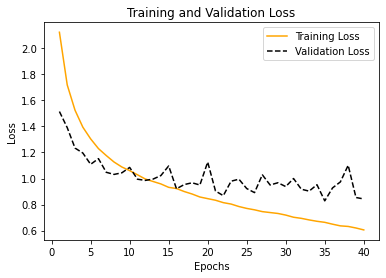

In [26]:
# Extract the training and validation loss values from the history object
train_loss = history_train_2.history['loss']
val_loss = history_train_2.history['val_loss']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, color = 'orange', linestyle = '-', label='Training Loss')
plt.plot(epochs, val_loss, color = 'black', linestyle = '--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plot the curve vs epochs of the training and the validation accuracy

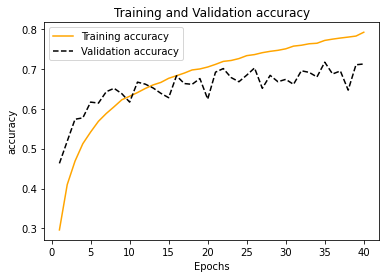

In [27]:
# Extract the training and validation loss values from the history object
train_accuracy = history_train_2.history['accuracy']
val_accuracy = history_train_2.history['val_accuracy']

# Plot the training and validation loss curves
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_accuracy, color = 'orange', linestyle = '-', label='Training accuracy')
plt.plot(epochs, val_accuracy, color = 'black', linestyle = '--', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
model2.compile( optimizer = optimizers.RMSprop(learning_rate=0.0001), loss ='categorical_crossentropy', metrics=['accuracy'] )

In [29]:
history_model2_train = model2.fit(x_train, y_train_vec, batch_size =128, epochs=40)

Epoch 1/40
391/391 [==============================] - 26s 65ms/step - loss: 0.6743 - accuracy: 0.7695
Epoch 2/40
391/391 [==============================] - 29s 75ms/step - loss: 0.6591 - accuracy: 0.7739
Epoch 3/40
391/391 [==============================] - 30s 77ms/step - loss: 0.6503 - accuracy: 0.7767
Epoch 4/40
391/391 [==============================] - 31s 80ms/step - loss: 0.6350 - accuracy: 0.7808
Epoch 5/40
391/391 [==============================] - 31s 80ms/step - loss: 0.6224 - accuracy: 0.7846
Epoch 6/40
391/391 [==============================] - 32s 81ms/step - loss: 0.6138 - accuracy: 0.7869
Epoch 7/40
391/391 [==============================] - 32s 81ms/step - loss: 0.6056 - accuracy: 0.7907
Epoch 8/40
391/391 [==============================] - 32s 82ms/step - loss: 0.5957 - accuracy: 0.7922
Epoch 9/40
391/391 [==============================] - 42s 107ms/step - loss: 0.5826 - accuracy: 0.8005
Epoch 10/40
391/391 [==============================] - 47s 120ms/step - loss: 0.5

In [30]:
accuracy = model2.evaluate(x_test, y_test_vec)
print('Loss =' + str(round(accuracy[0],2)))
print('Accuracy =' + str(round(accuracy[1],2)))

313/313 [==============================] - 2s 7ms/step - loss: 0.8705 - accuracy: 0.7219
Loss =0.87
Accuracy =0.72
